# K-Means

Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

In [384]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [385]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [387]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [388]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [389]:
data = data[['Latitude', 'Longitude', 'MedInc']]
data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [390]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Crear un DataFrame con los datos escalados y conservar los nombres de las columnas originales
data_s = pd.DataFrame(data_scaled, columns=data.columns)

# (Opcional) Ver estadísticos descriptivos
data_s.describe()

,Latitude,Longitude,MedInc
count,2.064000e+04,2.064000e+04,2.064000e+04
mean,-1.079584e-15,-8.526513e-15,6.058892e-17
std,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.447568e+00,-2.385992e+00,-1.774299e+00
25%,-7.967887e-01,-1.113209e+00,-6.881186e-01
50%,-6.422871e-01,5.389137e-01,-1.767951e-01
75%,9.729566e-01,7.784964e-01,4.593063e-01
max,2.958068e+00,2.625280e+00,5.858286e+00


In [391]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Dividir datos y variables de entrenamiento
x_train, x_test = train_test_split(data_s, test_size=0.2, random_state=42)


# Crear y entrenar modelo
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(x_train)  # <- obtenemos las etiquetas

# Predecir los clusters de test con el modelo entrenado
predict = kmeans.predict(x_test)

# Crear copias para añadir clusters
x_train_clustered = x_train.copy()
x_train_clustered["clustered"] = clusters  # etiquetas de entrenamiento

x_test_clustered = x_test.copy()
x_test_clustered["clustered"] = predict  # etiquetas del test

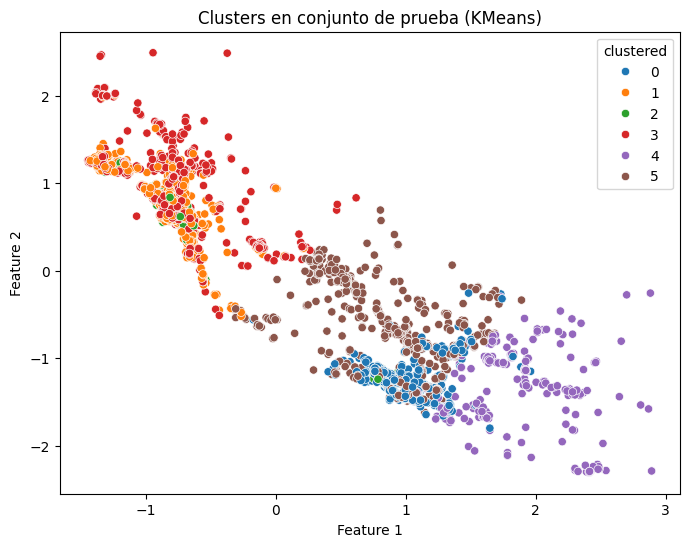

In [392]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=x_test.iloc[:, 0],
    y=x_test.iloc[:, 1],
    hue=x_test_clustered["clustered"],
    palette='tab10'
)
plt.title("Clusters en conjunto de prueba (KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Podemos ver los 6 clusters de casas, vemos como coinciden por color las longitudes y latitudes de las casas. En general podemos ver que el Kmeans generaliza bien.

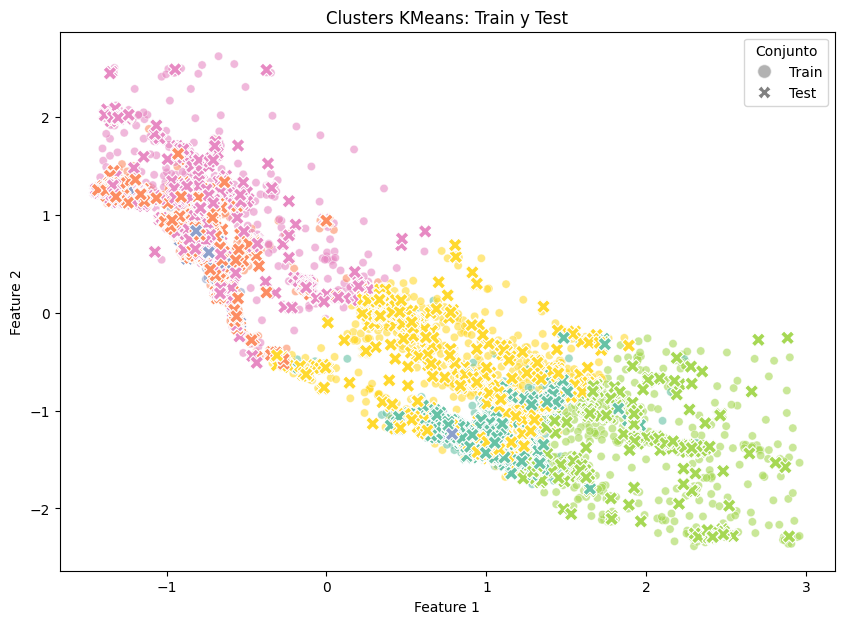

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(figsize=(10,7))

# Graficar puntos de entrenamiento (train) con su cluster
sns.scatterplot(
    x=x_train.iloc[:, 0], y=x_train.iloc[:, 1],
    hue=x_train_clustered["clustered"],
    palette='Set2', alpha=0.6, 
)

# Graficar puntos de test con cluster predicho, con otro marcador
sns.scatterplot(
    x=x_test.iloc[:, 0], y=x_test.iloc[:, 1],
    hue=x_test_clustered["clustered"],
    palette='Set2', marker='X', s=100, legend=None
)

plt.title("Clusters KMeans: Train y Test")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Leyenda personalizada para distinguir train y test
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Train', markerfacecolor='gray', markersize=10, alpha=0.6),
    Line2D([0], [0], marker='X', color='w', label='Test', markerfacecolor='gray', markersize=10)
]
plt.legend(handles=legend_elements, title='Conjunto')

plt.show()

Las x nos muestran las predicciones de nuestro modelo en base a los datos. Como podemos darnos cuenta se reduce la varianza

# Modelo de aprendizaje supervisado

In [394]:
x_train_clustered.head()

,Latitude,Longitude,MedInc,clustered
14196,-1.367976,1.267645,-0.321654,3
8267,-0.871699,0.703627,-0.030620,3
17445,-0.455012,-0.454356,0.150349,1
14265,-1.377340,1.227714,-1.014947,3
2271,0.537543,-0.114948,-0.166583,5


In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Datos para entrenamiento
X_train_rf = x_train_clustered.drop(columns=["clustered"])
y_train_rf = x_train_clustered["clustered"]


# Datos para test
X_test_rf = x_test_clustered.drop(columns=["clustered"])
y_test_rf = x_test_clustered["clustered"]

# Crear y entrenar modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_rf, y_train_rf)

# Predecir
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluar
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print(classification_report(y_test_rf, y_pred_rf))


Accuracy: 0.9937015503875969
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       557
           1       0.99      1.00      1.00       897
           2       1.00      0.97      0.99       116
           3       1.00      1.00      1.00      1397
           4       0.98      0.98      0.98       246
           5       0.99      0.99      0.99       915

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [400]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_rf, y_pred_rf)
print(cm)

[[ 555    0    0    0    2    0]
 [   0  895    0    1    0    1]
 [   1    2  113    0    0    0]
 [   0    3    0 1393    0    1]
 [   0    0    0    0  241    5]
 [   6    0    0    0    4  905]]


como podemos darnos cuenta nuesto modelo de aprendizaje supervisado lo hace muy bien. 

# Guardamos los modelos

In [402]:
import joblib

# Guardar modelo KMeans
joblib.dump(kmeans, "/workspaces/machine-learning-python-linear-regression/models/kmeans_model.pkl")

# Guardar modelo Random Forest
joblib.dump(rf_model, "/workspaces/machine-learning-python-linear-regression/models/random_forest_model.pkl")

['/workspaces/machine-learning-python-linear-regression/models/random_forest_model.pkl']